# Module 2 Final Project: Hypothesis Testing of Northwind Database
### By: Gabe Blatstein

#### Blog Post Link:
#### Presentation Link:

### Project Goal

The goal of this project is to prove or disprove whether certain hypothesises using statistical analysis techniques such as t-tests or ANOVA tests. 
First we will run one expirment that is required which is listed below, followed by three other experiments I came up with on my own. 

First we will provide a little bit of background and do a little bit of digging through the database to get our bearings on the data. 

### Data Extraction and Exploration

In [1]:
import sqlalchemy  ### Importing necessary libraries to extract the data easily using an ORM
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
import pandas as pd
import numpy as np

engine = create_engine('sqlite:///Northwind_small.sqlite', echo= True) #creating a engine object to then bind to our database
session = sessionmaker(bind=engine)
session = Session() #creating a new session object to run our queries

In [2]:
from sqlalchemy import inspect #Importing library to easily inspect each of the tables

inspector = inspect(engine)

table_names=pd.DataFrame(inspector.get_table_names())
table_names.rename(columns= {0 : 'Table Names'})

2019-05-29 20:34:40,686 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-29 20:34:40,687 INFO sqlalchemy.engine.base.Engine ()
2019-05-29 20:34:40,688 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-29 20:34:40,690 INFO sqlalchemy.engine.base.Engine ()
2019-05-29 20:34:40,692 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-05-29 20:34:40,693 INFO sqlalchemy.engine.base.Engine ()


,Table Names
0,Category
1,Customer
2,CustomerCustomerDemo
3,CustomerDemographic
4,Employee
5,EmployeeTerritory
6,Order
7,OrderDetail
8,Product
9,Region


In [3]:
sample_df= pd.read_sql_query('''SELECT * FROM 'Order' ''', engine) 
sample_df.head() #Using read_sql_query to connect and retrieve data from one table

2019-05-29 18:10:56,932 INFO sqlalchemy.engine.base.Engine SELECT * FROM 'Order' 
2019-05-29 18:10:56,934 INFO sqlalchemy.engine.base.Engine ()


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


Now that we have our notebook all set up with the necessary sql libraries and an established connection, lets move ahead to the first question. 

But, before we do that we will want to define some functions to make this notebook much more clean and efficient.

#### Function Declarations 

There are three functions we will want to build: 
 1. A t-test function
     Defintion: A t test also known as a "Student T Test" compares two averages an tells us if they are significantly      different from eachother. 
     Ouputs: 
         a. t-score: high t-score equals different groups vs. small t-score equals similar groups
         b. p-values: tell us if our difference in means is by chance (a low p-value of say .01 means there is a 1%               chance the difference was due to chance.
 2. A ANOVA test function
     Defintion: A ANOVA test can be though of as a extension of a t-test and should be used when you want to compare      the means of two or more groups
     Outputs:
         a. sum_squares:
         b. df:
         c. F
         d. PR(>F): probability the factor is indeed influential
 3. Cohen's d function to accompany either of the prior tests (measures effect size)
     Definition: represents the magnitude of differences between two or more groups on a given variable (most common      way to measure effect size)
     Outputs:
         a. Cohen's d: a large d value means the greater the difference aka the bigger the effect size

In [36]:
#First the t-test function
from decimal import Decimal
def t_test(sample1,sample2):
    t_stat, p = stats.ttest_ind(sample1, sample2)
    if p < .05:
        return print('Due to a p-value of,', '%.2E' % Decimal(p),', we reject the null hypothesis and accept the alternative hypothesis.\nThe t-score is',t_stat)

In [ ]:
#Next the ANOVA test function 

def anova_test(data):
    for col in data:


In [37]:
#Finally Cohen's-d

def cohens_d(group1, group2):
    diff = group1.mean() - group2.mean()
    
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    
    #Next we calculate the pooled variable which is the denominator (Standardiser)
    pooled_var = (n1* var1 + n2* var2)/ (n1 + n2)
    
    cohen_d= diff/np.sqrt(pooled_var)
    
    return d

### Question 1

1. Do discounts have a statistically significant effect on the number of products customers order?
2. If so, at what level(s) of discount?

#### 1. Do discounts have a statistically significant effect on the number of products customers order?

First we will have to retrieve the data. It looks like we will want to join the Orders table with the Orders Details table. For this question, we only care about the number of products (quantity) and then whether the product had a discount?

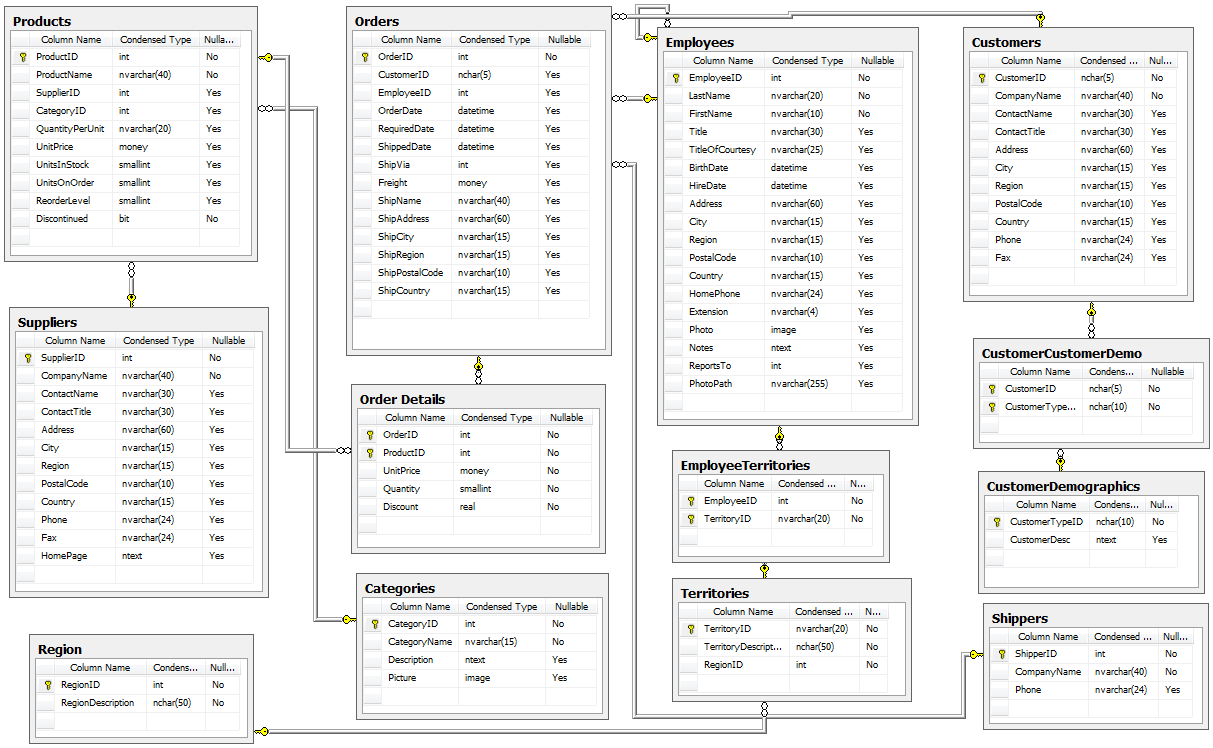

In [4]:
df_discounts= pd.read_sql_query('SELECT * FROM OrderDetail',engine)
df_discounts.head()

2019-05-29 18:10:56,998 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail
2019-05-29 18:10:57,000 INFO sqlalchemy.engine.base.Engine ()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [35]:
#Look into just making this a query instead
discount_quan= df_discounts[df_discounts['Discount']==0]['Quantity'] #Divide into quantities with discounts
non_discount_quan= df_discounts[df_discounts['Discount']!=0]['Quantity'] #Divide dataframe into quantities without discounts

t_test(discount_quan, non_discount_quan)

Due to a p-value of, 1.14E-10 , we reject the null hypothesis and accept the alternative hypothesis.
The t-score is -6.4785631962949015 .


In [14]:
territories= pd.read_sql_query('SELECT * FROM Shipper', engine)

2019-05-29 18:33:51,878 INFO sqlalchemy.engine.base.Engine SELECT * FROM Shipper
2019-05-29 18:33:51,879 INFO sqlalchemy.engine.base.Engine ()
